In [6]:
import json
import pandas as pd
import os
from collections import Counter
import seaborn as sns
from matplotlib.pyplot import plot, figure

In [7]:
path = "data/json_files"

In [8]:
data_files = [(os.path.join(path, file), file) for file in os.listdir(path) if file.endswith(".json")]

In [9]:
file_names = [file[1].split('.')[0].lower() for file in data_files]

In [10]:
file_names

['javascript',
 'php',
 'cpp',
 'c',
 'java',
 'haskell',
 'r',
 'csharp',
 'python',
 'swift']

In [11]:
data_frames = []

In [12]:
for file in data_files:
    with open(file[0], "r") as fp:
        python_data = json.load(fp)
        
    df = pd.DataFrame(python_data["Post"]).T
    df["name"] = df["creatorId"].apply(lambda x: python_data["User"][x]["name"])
    df["collectionName"] = df["homeCollectionId"].apply(lambda x: python_data["Collection"]
                                                    .get(x, {})
                                                    .get("Name", None))
    df["followerCount"] = df["homeCollectionId"].apply(lambda x: python_data["Collection"]
                                                   .get(x, {})
                                                   .get("metadata", {})
                                                   .get("followerCount", None))
    drops = ['latestVersion', 'latestPublishedVersion', 'hasUnpublishedEdits', 'latestRev', 'updatedAt',
        'acceptedAt', 'firstPublishedAt', 'latestPublishedAt', 'uniqueSlug', 'isEligibleForRevenue']

    df.drop(drops, axis=1, inplace=True)
    data_frames.append(df)

In [61]:
df = pd.concat(data_frames, axis=0)

In [62]:
df.shape

(247728, 20)

In [63]:
len(set(df.index))

242143

In [64]:
df = df.loc[~df.index.duplicated(keep='first')]

In [65]:
df[df["detectedLanguage"] == 'en'].shape

(204203, 20)

In [66]:
df["totalArticles"] = 1

In [67]:
df.loc[df["homeCollectionId"] == "", "collectionName"] = "individual"

In [68]:
#df_pie = df.groupby("collectionName").sum().sort_values(by="totalArticles", ascending=False)
#df_pie["other"] = df_pie.index
#df_pie.loc[df_pie["totalArticles"] < 100, "other"] = "Other"
#df_pie.groupby("other").sum().plot.pie(y="totalArticles", figsize=(15,15))

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242143 entries, 6919d7ae948e to 504dc9589f3d
Data columns (total 21 columns):
creatorId                242143 non-null object
homeCollectionId         242143 non-null object
title                    242143 non-null object
detectedLanguage         242143 non-null object
createdAt                242143 non-null object
imageCount               242143 non-null object
readingTime              242143 non-null object
subtitle                 242143 non-null object
recommends               242143 non-null object
isBookmarked             242143 non-null object
socialRecommendsCount    242143 non-null object
responsesCreatedCount    242143 non-null object
totalClapCount           242143 non-null object
sectionCount             242143 non-null object
linkCount                242143 non-null object
tags                     242143 non-null object
latestAcquiredDate       242143 non-null object
name                     242143 non-null object
collectionNam

In [70]:
df.tail()

,creatorId,homeCollectionId,title,detectedLanguage,createdAt,imageCount,readingTime,subtitle,recommends,isBookmarked,...,responsesCreatedCount,totalClapCount,sectionCount,linkCount,tags,latestAcquiredDate,name,collectionName,followerCount,totalArticles
4f3ad5cec659,caf0be0d0b1d,e5aa441dac43,How can I use User Defaults in Swift?,en,1581484948893,1,4.06415,Know about what is User Defaults and understan...,1,False,...,0,2,1,0,"[Userdefaults, iOS, Swift, Prefrence, Codable]","[2020, 02, 29]",samson sunny,None,9.0,1
408f1b35941d,756b12d16283,,Experiment of the UILabel optimisation advice ...,en,1582486471905,5,3.45597,This blog post has been going viral for the pa...,0,False,...,0,0,5,3,"[Swift, Swift Programming, Memory Improvement,...","[2020, 02, 29]",Yuichi Fujiki,individual,NaN,1
c42022e8b7d5,bc691a798f3d,,“Haptify” — A simple feedbacker lib to make yo...,en,1582954753913,0,1.29057,“Haptify” provides easy APIs to integrate and ...,0,False,...,0,0,1,7,"[iOS, Haptic Feedback, Swift, Objective C]","[2020, 02, 29]",Anand Kore,individual,NaN,1
e8572bad9c3c,a34be13afef,ef46e27dab6f,iOS App 的進入點與純 Code 建立 TableView,zh-Hant,1582957531588,7,2.172,前言,0,False,...,0,0,4,2,"[Swift, iOS, Programming, Engineering, Beginner]","[2020, 02, 29]",Lacie,None,1.0,1
504dc9589f3d,51bba47a7c66,,Formatting UITextField numeric inputs to be a ...,en,1582961093894,6,2.22547,"There is an UITextField on the View, the requi...",0,False,...,0,0,1,0,"[Swift, Swift Programming, Mobile App Developm...","[2020, 02, 29]",YN Duan,individual,NaN,1


In [71]:
df['date'] = pd.to_datetime(df['createdAt'],unit='ms')

In [72]:
df = df[df['date'] > '2015-02-02']

In [73]:
langs = ["Python", "JavaScript", "Cpp", "C", "Swift", "php", "Haskell", "Csharp"]

In [74]:
def addLanguages(li):
    for el in li:
        df[el] = df["tags"].apply(lambda x: 1 if el in x else 0)
        print(el, ': ', (df[el] == 1).sum())

In [75]:
addLanguages(langs)

Python :  43943
JavaScript :  129478
Cpp :  1428
C :  1873
Swift :  21526
php :  0
Haskell :  1136
Csharp :  3754


In [76]:
aggColumns = {'totalArticles':'mean'}#, 'totalClapCount':'sum'}
for lang in langs:
    aggColumns.update({lang: 'mean'})

In [77]:
new_df = (df.groupby([pd.Grouper(key='date', freq='1W')])
          .agg(aggColumns))
df = {}

In [78]:
new_df.tail(10)

,totalArticles,Python,JavaScript,Cpp,C,Swift,php,Haskell,Csharp
date,,,,,,,,,
2019-12-29,1,0.287845,0.460104,0.007457,0.004474,0.056674,0,0.001491,0.019389
2020-01-05,1,0.282523,0.452037,0.005256,0.011170,0.075558,0,0.007227,0.013141
2020-01-12,1,0.260181,0.468891,0.007353,0.013575,0.063914,0,0.005090,0.013575
2020-01-19,1,0.310845,0.401639,0.005044,0.007566,0.080706,0,0.001892,0.012610
2020-01-26,1,0.290391,0.412100,0.007829,0.009964,0.069751,0,0.002847,0.008541
2020-02-02,1,0.300000,0.427143,0.004286,0.010714,0.092143,0,0.001429,0.012857
2020-02-09,1,0.323841,0.394040,0.007947,0.017881,0.074834,0,0.002649,0.012583
2020-02-16,1,0.317404,0.383738,0.007846,0.004280,0.081312,0,0.002853,0.010699
2020-02-23,1,0.294948,0.399703,0.006686,0.008172,0.080981,0,0.000743,0.021545


In [79]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 2015-02-08 to 2020-03-01
Freq: W-SUN
Data columns (total 9 columns):
totalArticles    265 non-null int64
Python           265 non-null float64
JavaScript       265 non-null float64
Cpp              265 non-null float64
C                265 non-null float64
Swift            265 non-null float64
php              265 non-null int64
Haskell          265 non-null float64
Csharp           265 non-null float64
dtypes: float64(7), int64(2)
memory usage: 30.7 KB


In [80]:
new_df[langs] = new_df[langs].div(new_df["totalArticles"], axis=0)

In [81]:
new_df.dropna(0, inplace=True)

In [82]:
new_df.columns

Index(['totalArticles', 'Python', 'JavaScript', 'Cpp', 'C', 'Swift', 'php',
       'Haskell', 'Csharp'],
      dtype='object')

In [88]:
new_df.drop("totalArticles", axis=1, inplace=True)

In [83]:
new_df.tail()

,totalArticles,Python,JavaScript,Cpp,C,Swift,php,Haskell,Csharp
date,,,,,,,,,
2020-02-02,1,0.300000,0.427143,0.004286,0.010714,0.092143,0.0,0.001429,0.012857
2020-02-09,1,0.323841,0.394040,0.007947,0.017881,0.074834,0.0,0.002649,0.012583
2020-02-16,1,0.317404,0.383738,0.007846,0.004280,0.081312,0.0,0.002853,0.010699
2020-02-23,1,0.294948,0.399703,0.006686,0.008172,0.080981,0.0,0.000743,0.021545
2020-03-01,1,0.319052,0.397448,0.004558,0.014585,0.061987,0.0,0.001823,0.016408


In [84]:
type(new_df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

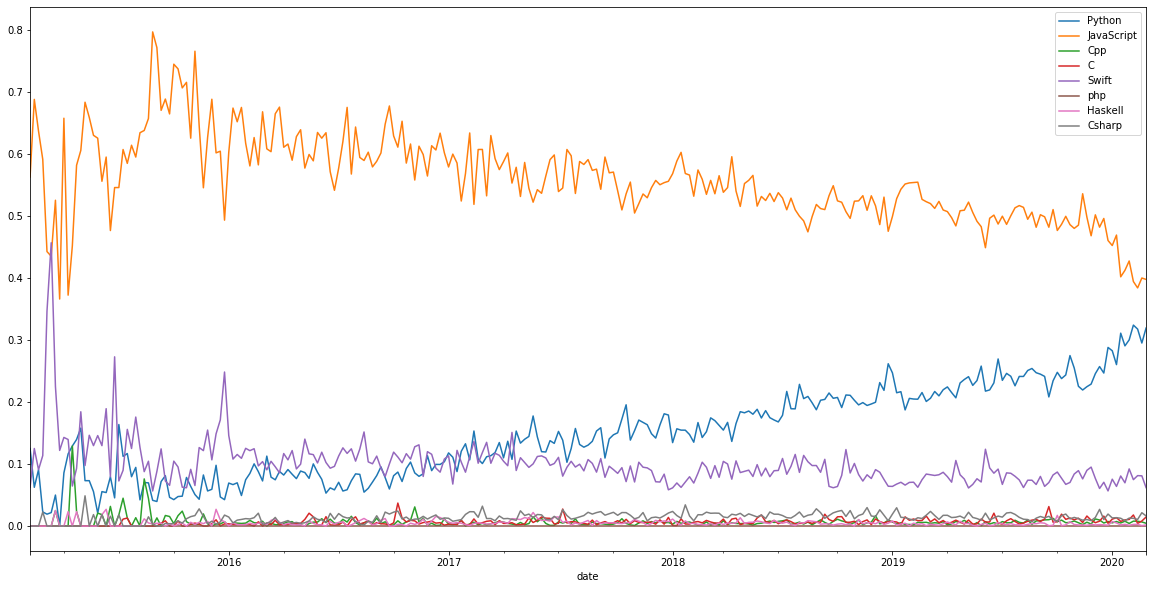

In [89]:
new_df.plot(figsize=(20,10))

In [86]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('new_df', 21224),
 ('Counter', 1056),
 ('aggColumns', 368),
 ('df', 240),
 ('python_data', 240),
 ('fp', 216),
 ('data_files', 192),
 ('data_frames', 192),
 ('file_names', 192),
 ('drops', 144),
 ('addLanguages', 136),
 ('figure', 136),
 ('plot', 136),
 ('langs', 128),
 ('lang', 83),
 ('pd', 80),
 ('sns', 80),
 ('file', 64),
 ('path', 64)]

In [87]:
s = set()
s.

SyntaxError: invalid syntax (<ipython-input-87-8d26910d9d28>, line 2)

In [ ]:
s = set()
for li in df.loc[:, "tags"].values.tolist():
    for el in li:
        s.add(el)
len(s)

In [ ]:
list(s)[1:100]

In [ ]:
df.shape